# About Dataset

This dataset offers a detailed collection of information about various stars in our galaxy. It includes key characteristics such as stellar temperature, luminosity, radius, and spectral class, providing a comprehensive view of different types of stars.

The data is structured to help astronomers, researchers, and enthusiasts explore the relationships between these stellar attributes and better understand the diversity of stars in the universe. Each entry in the dataset represents a unique star, with data sourced from astronomical surveys and observations.

Whether you're interested in studying the life cycle of stars, their physical properties, or just exploring the vastness of space, this dataset serves as a valuable resource for all things celestial. Dive in and discover the wonders of the stars!

The file star_data.csv contains a structured dataset with key information about various stars. Each row represents a unique star, and the columns provide the following details:

- Star ID: A unique identifier for each star.
    
- Temperature (K): The surface temperature of the star in Kelvin.
    
- Luminosity (L/Lo): The luminosity of the star compared to that of the Sun.
    
- Radius (R/Ro): The radius of the star relative to the Sun's radius.
    
- Spectral Class: The star’s classification based on its spectral characteristics (e.g., O, B, A, F, G, K, M).

- Color: The color of the star, which correlates with its temperature.
    
- Distance (ly): The distance of the star from Earth in light-years.   

# Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Overview

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CelioMaciel179/eda_stars/main/datasets/star_dataset.csv')

df.head()

,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve
3,Polaris,322.601002,2196.241934,37.546813,6048.326915,F7Ib
4,Barnard's Star,5.902392,-1.496486,0.192359,3130.602069,M4Ve


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Distance (ly)      1000 non-null   float64
 2   Luminosity (L/Lo)  1000 non-null   float64
 3   Radius (R/Ro)      1000 non-null   float64
 4   Temperature (K)    1000 non-null   float64
 5   Spectral Class     1000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


# Preparation

In [4]:
df.isnull().sum()

Name                 0
Distance (ly)        0
Luminosity (L/Lo)    0
Radius (R/Ro)        0
Temperature (K)      0
Spectral Class       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# categorize stars into temperature ranges.
def classify_steller_on_temperature(temp):
    if 30000 <= temp <= 50000:
        return 'O'
    elif 10000 <= temp < 30000:
        return 'B'
    elif 7500 <= temp < 10000:
        return 'A'
    elif 6000 <= temp < 7500:
        return 'F'
    elif 5200 <= temp < 6000:
        return 'G'
    elif 3700 <= temp < 5200:
        return 'K'
    elif temp < 3700:
        return 'M'
    else:
        return 'Unknown'
df['Spectral Class Principal']=df['Temperature (K)'].apply(classify_steller_on_temperature)

In [7]:
df.head()

,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class,Spectral Class Principal
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V,A
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia,A
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve,M
3,Polaris,322.601002,2196.241934,37.546813,6048.326915,F7Ib,F
4,Barnard's Star,5.902392,-1.496486,0.192359,3130.602069,M4Ve,M


In [8]:
#The dictionary will give color to each class.
color_map = {
    'O': 'Blue',
    'B': 'Blue-White',
    'A': 'White',
    'F': 'Yellow-White',
    'G': 'Yellow',
    'K': 'Orange',
    'M': 'Red'
}

# Create a new column for color based on the Stellar Class
df['Color'] = df['Spectral Class Principal'].map(color_map)

In [9]:
df.head()

,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class,Spectral Class Principal,Color
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V,A,White
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia,A,White
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve,M,Red
3,Polaris,322.601002,2196.241934,37.546813,6048.326915,F7Ib,F,Yellow-White
4,Barnard's Star,5.902392,-1.496486,0.192359,3130.602069,M4Ve,M,Red


# Statistical Summary

In [10]:
df.describe()

,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,295.505327,19644.909442,86.960696,9983.486779
std,541.478403,42223.595017,213.850005,7906.973529
min,3.877798,-4.993141,0.068087,2750.183163
25%,11.716853,10.441039,1.664479,3940.020856
50%,52.031435,171.097809,5.845444,7379.007975
75%,322.865874,10500.577117,33.719778,12055.975095
max,2600.490723,196004.854081,887.097936,28044.279272


In [13]:
df.Color.value_counts()

Color
Blue-White      291
Red             239
White           202
Yellow-White    104
Orange           95
Yellow           69
Name: count, dtype: int64

In [22]:
df['Spectral Class Principal'].value_counts()

Spectral Class Principal
B    291
M    239
A    202
F    104
K     95
G     69
Name: count, dtype: int64

In [11]:
df['Spectral Class'].value_counts()

Spectral Class
A7V         74
A1V         73
A9II        48
M3.5V       45
B1III       45
M2Iab       44
G8III       39
M4Ve        38
A0V         38
K1.5III     38
B2III       37
M7IIIe      37
B0Ia        36
G2V         36
F7Ib        35
B1III-IV    32
A3V         31
F5IV-V      30
B0.5IV      30
B6Vep       29
M2.1V       27
M1.5Iab     26
B7V         26
A2Ia        25
K1V         24
M6V         22
K5III       18
B8Ia        17
Name: count, dtype: int64

In [14]:
df.describe(include='object')

,Name,Spectral Class,Spectral Class Principal,Color
count,1000,1000,1000,1000
unique,29,28,6,6
top,Altair,A7V,B,Blue-White
freq,74,74,291,291


# Distribution of Numerical Variables

In [50]:
n = len(df)
k = int(np.ceil(np.log2(n) + 1))
k

11

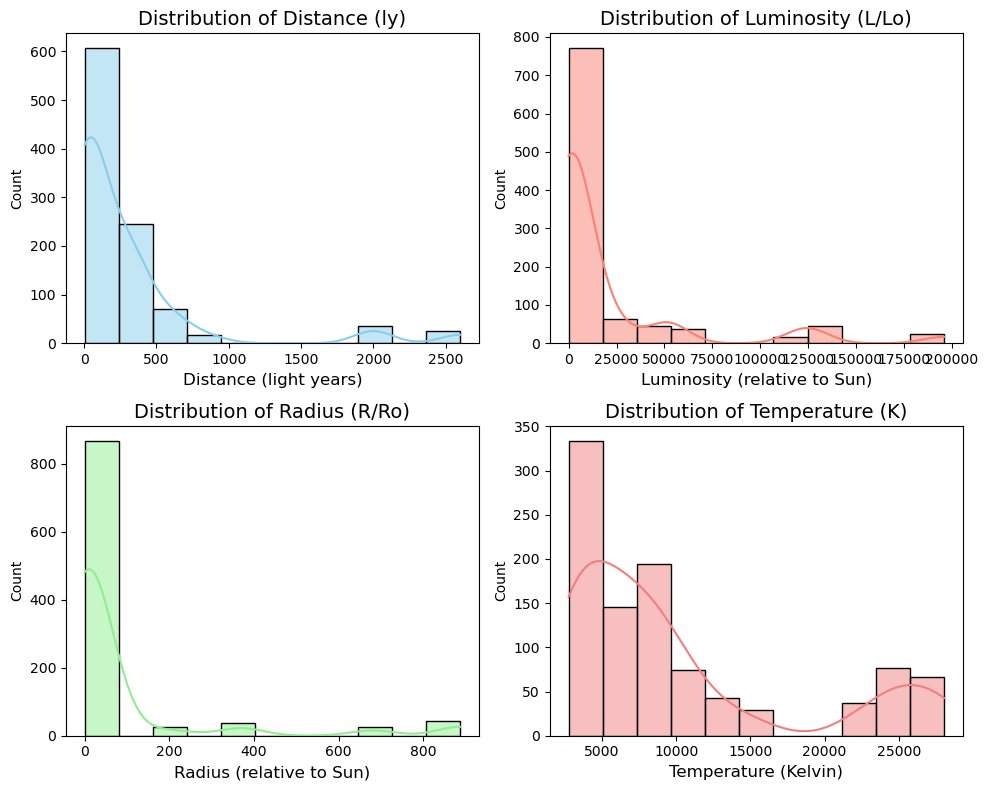

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df['Distance (ly)'], kde=True, ax=axes[0, 0], color='skyblue', bins=k)
axes[0, 0].set_title('Distribution of Distance (ly)', fontsize=14)
axes[0, 0].set_xlabel('Distance (light years)', fontsize=12)

sns.histplot(df['Luminosity (L/Lo)'], kde=True, ax=axes[0, 1], color='salmon', bins=k)
axes[0, 1].set_title('Distribution of Luminosity (L/Lo)', fontsize=14)
axes[0, 1].set_xlabel('Luminosity (relative to Sun)', fontsize=12)

sns.histplot(df['Radius (R/Ro)'], kde=True, ax=axes[1, 0], color='lightgreen', bins=k)
axes[1, 0].set_title('Distribution of Radius (R/Ro)', fontsize=14)
axes[1, 0].set_xlabel('Radius (relative to Sun)', fontsize=12)

sns.histplot(df['Temperature (K)'], kde=True, ax=axes[1, 1], color='lightcoral', bins=k)
axes[1, 1].set_title('Distribution of Temperature (K)', fontsize=14)
axes[1, 1].set_xlabel('Temperature (Kelvin)', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation Matrix

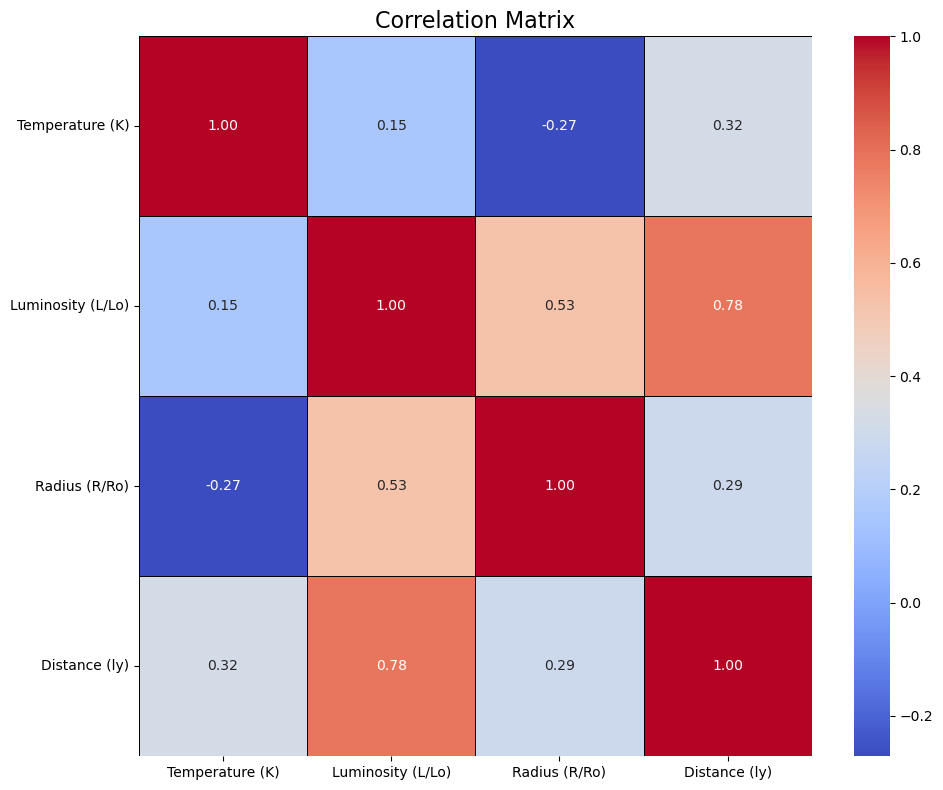

In [16]:
corr_matrix = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Distance (ly)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix', fontsize=16)
plt.yticks(rotation=0)

plt.tight_layout()  
plt.show()

There is a significant correlation between luminosity and two other factors, distance and radius, which should be considered in future analyses.

# Relationship between numeric variables

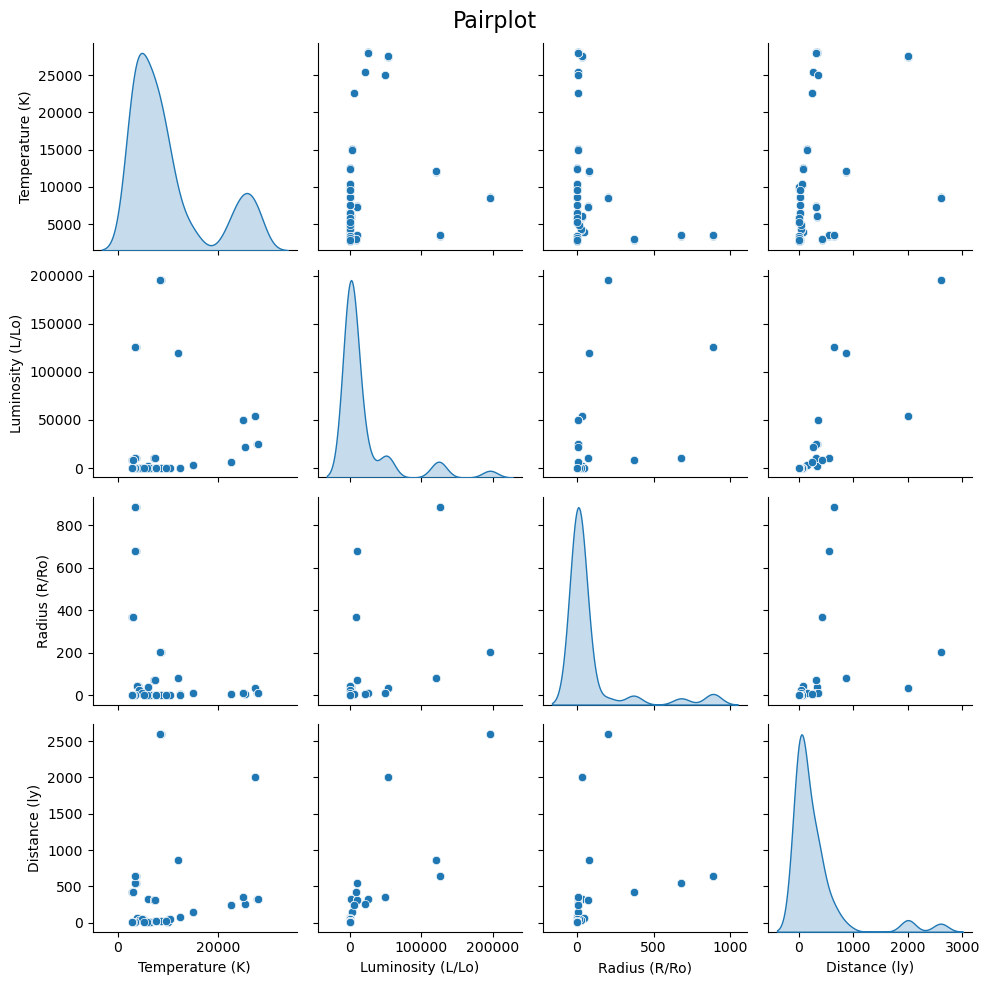

In [17]:
sns.pairplot(df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Distance (ly)']],
             diag_kind='kde')

plt.suptitle('Pairplot', fontsize=16)
plt.tight_layout()
plt.show()

# Distribution of Categorical Variables

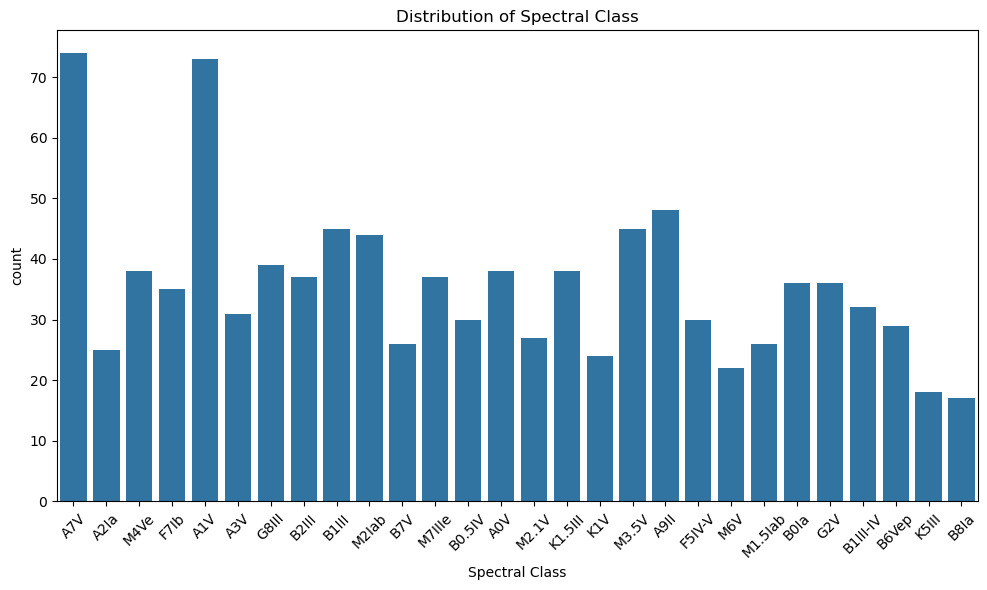

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Spectral Class')

plt.title('Distribution of Spectral Class')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

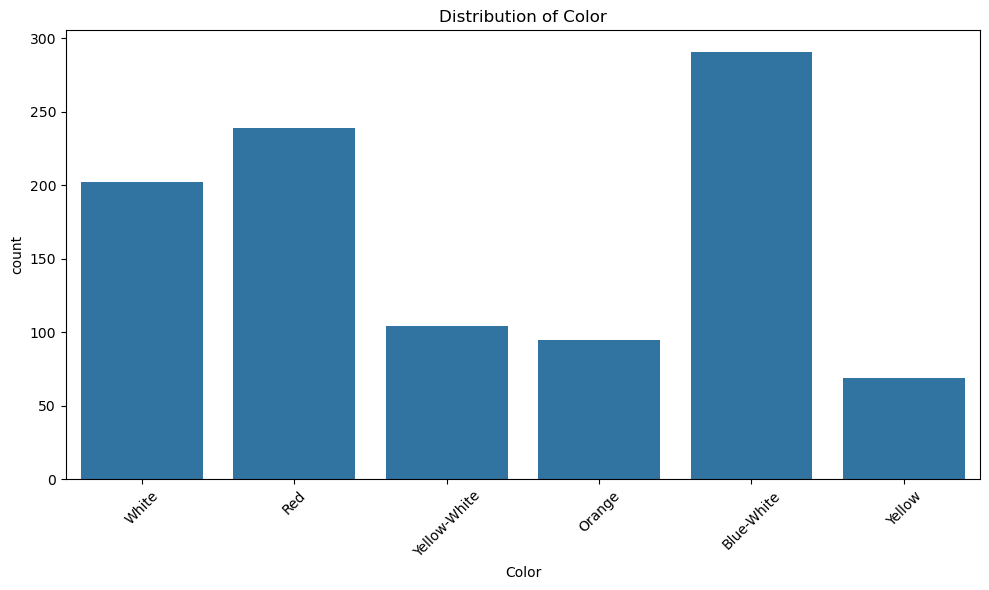

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color')

plt.title('Distribution of Color')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# Boxenplots

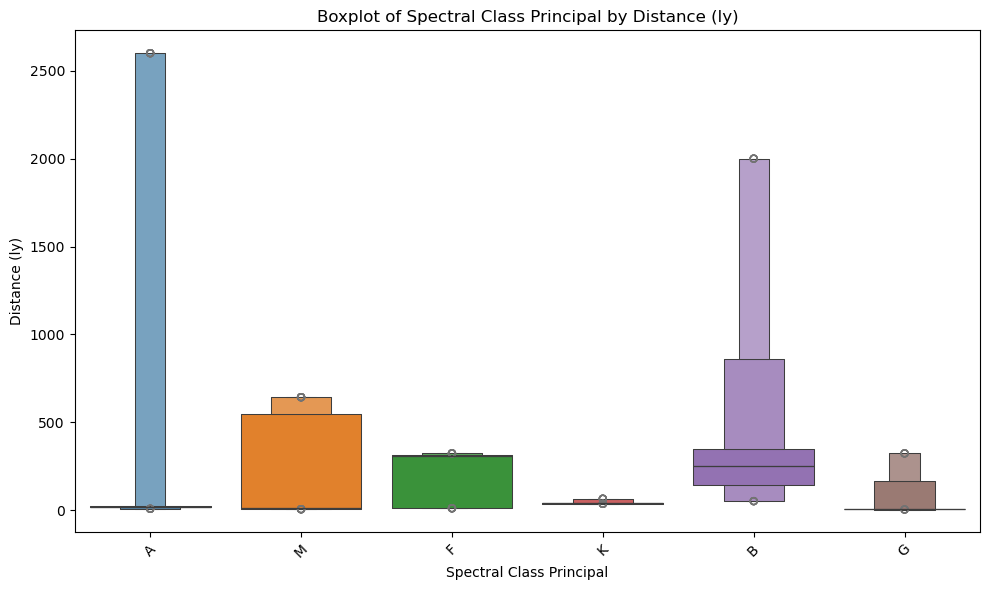

In [27]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Spectral Class Principal', y='Distance (ly)', hue='Spectral Class Principal' )

plt.title('Boxplot of Spectral Class Principal by Distance (ly)')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

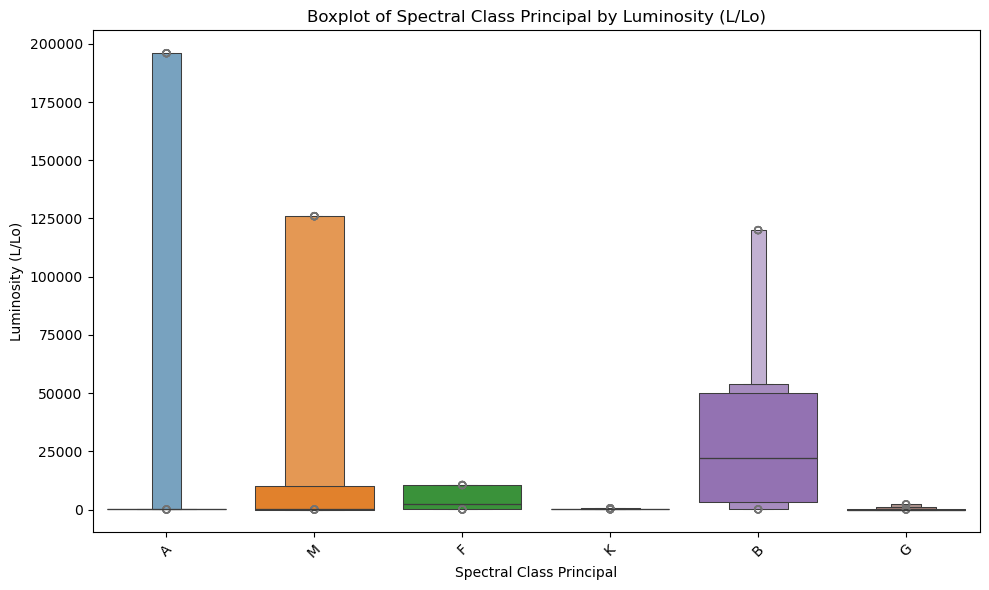

In [44]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Spectral Class Principal', y='Luminosity (L/Lo)', hue='Spectral Class Principal' )

plt.title('Boxplot of Spectral Class Principal by Luminosity (L/Lo)')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

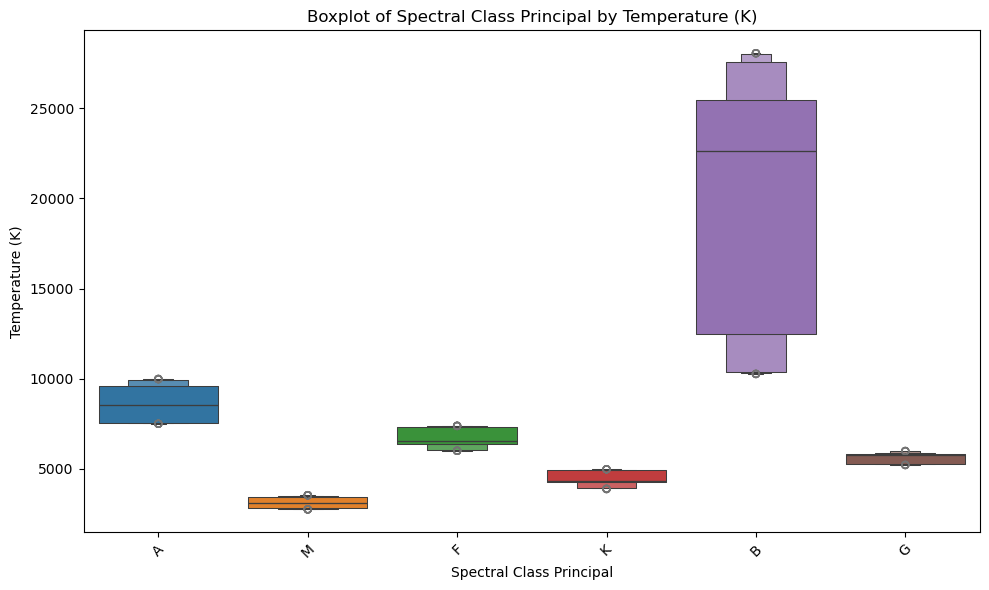

In [45]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Spectral Class Principal', y='Temperature (K)', hue='Spectral Class Principal',  )

plt.title('Boxplot of Spectral Class Principal by Temperature (K)')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()